<a href="https://colab.research.google.com/github/michellecorreaa/Estudos_Machine_Learning/blob/main/Previs%C3%A3o_de_custos_m%C3%A9dicos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Previsão de custos médicos - Fundamentos de Machine Learning

O objetivo desse projeto é de prever os custos médicos individuais dos beneficiários de um seguro de saude.

Aprendizagem de máquina supervisionado, modelo de Regressão Linear

Importação dos dados de custos médicos

fonte dos dados:
kaggle: https://www.kaggle.com/mirichoi0218/insurance

In [7]:
#Coletando a base de dados

import pandas as pd
url = 'https://raw.githubusercontent.com/michellecorreaa/Estudos_Machine_Learning/main/insurance.csv'
dados = pd.read_csv(url)

In [4]:
dados.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
#Para saber o tipo de variáveis
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


As variáveis deste dataset se classificam em:


*   **Age (Idade do beneficiário principal): **quantitativa discreta
*   **Sex (Gênero do contratante do seguro):** qualitativa nominal
*   **Bmi (Índice de Massa Corporal): **quantitativa contínua
*   **Children (Quantidade de filhos cobertos pelo seguro):** quantitativa discreta
*   **Smoker (Fumante):** qualitativa nominal
*  **Region (Região residencial do beneficiário):** qualitativa nominal
*   **Charges (Custos médicos individuais):** quantitativa contínua





















In [8]:
#Análises descritivas das variáveis
dados.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


# **Análise Exploratória dos dados**
**Visualização de dados**

In [9]:
# Instalando biblioteca de visualização de dados

!pip install sweetviz

     |████████████████████████████████| 15.1 MB 4.4 MB/s 


In [10]:
#importanto a biblioteca
import sweetviz as sv

In [11]:
eda= sv.analyze(source = dados, target_feat = 'charges')

                                             |          | [  0%]   00:00 -> (? left)


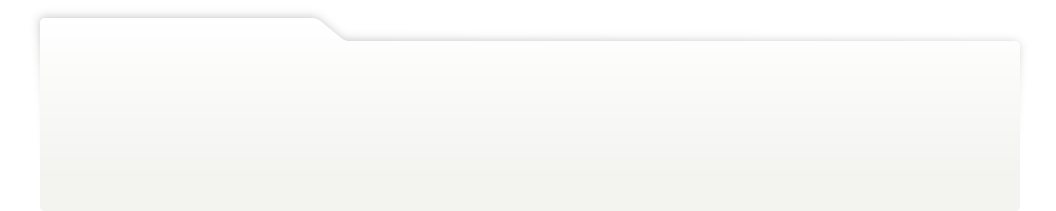
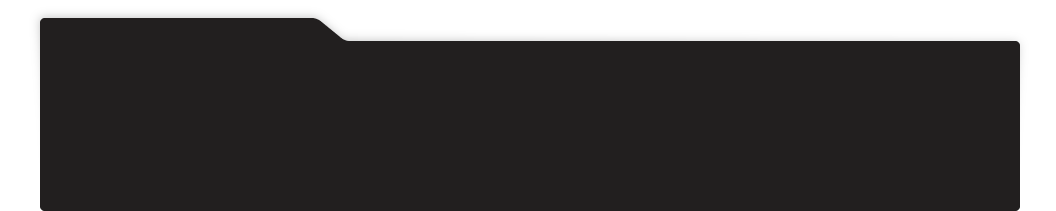
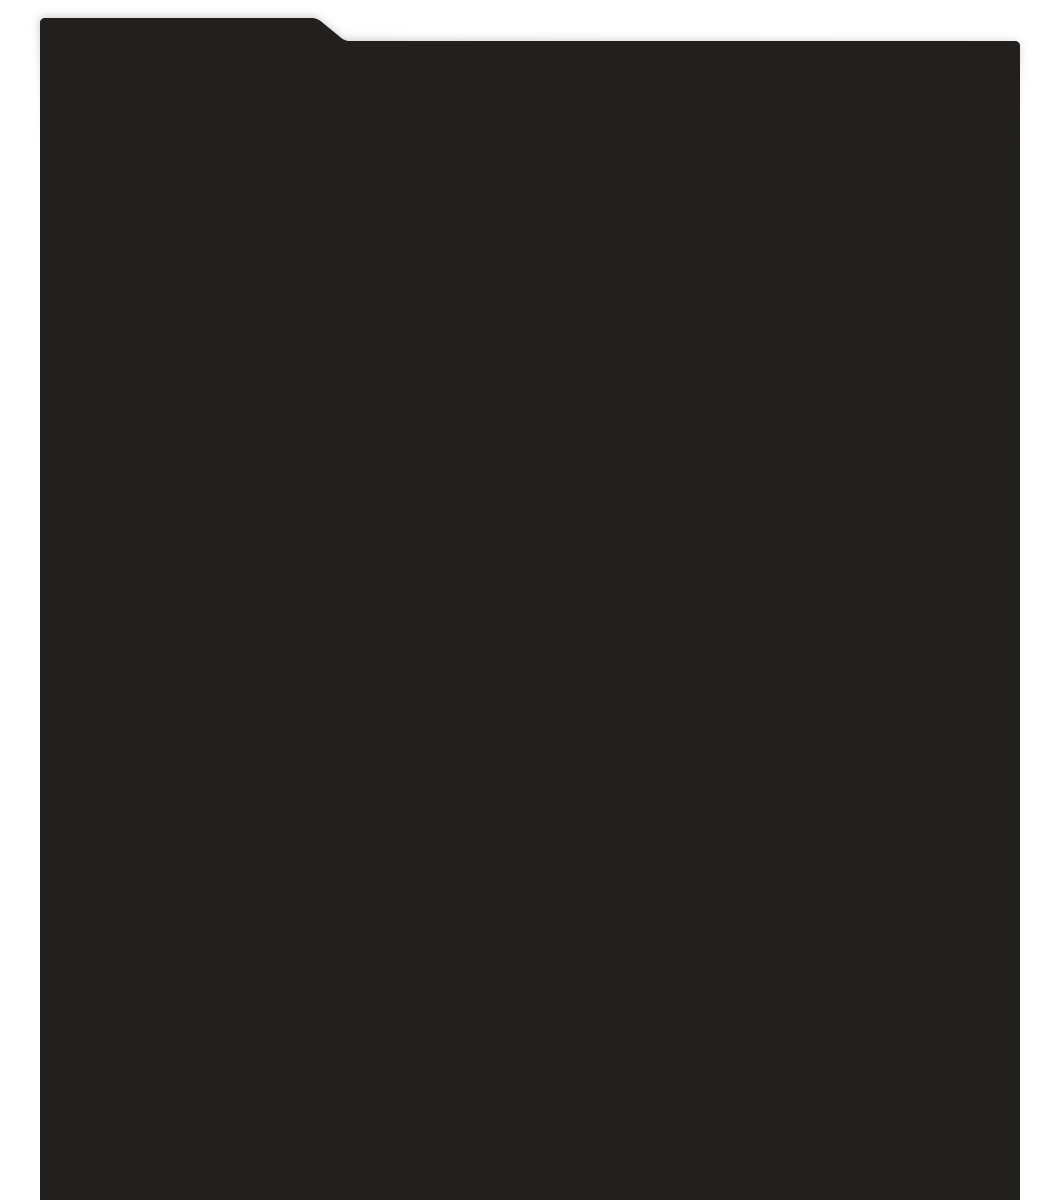
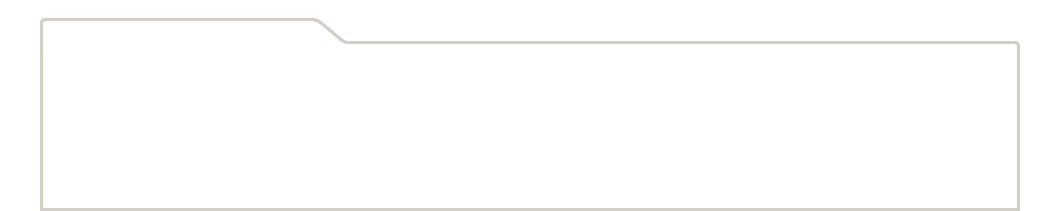
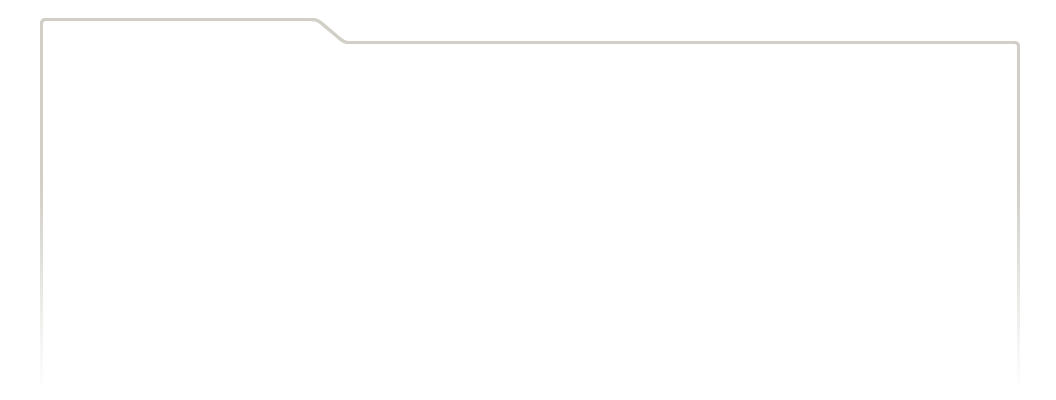
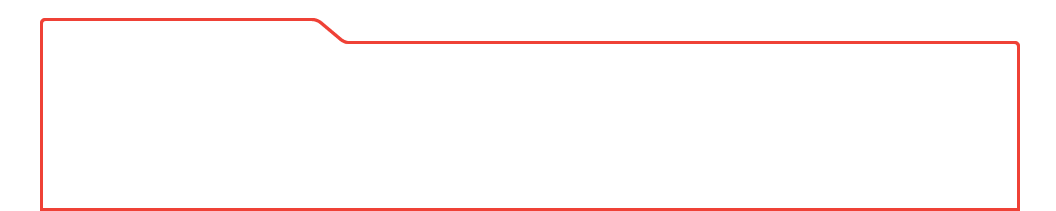
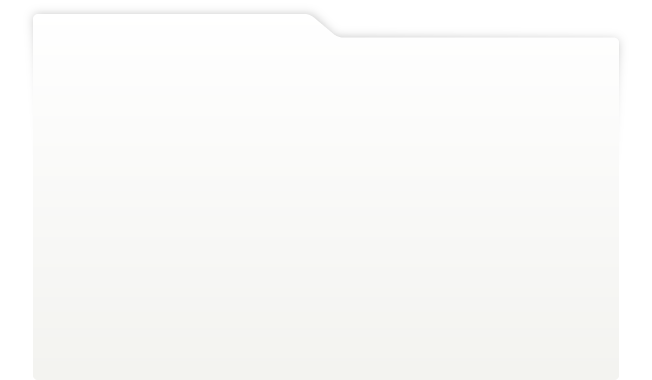
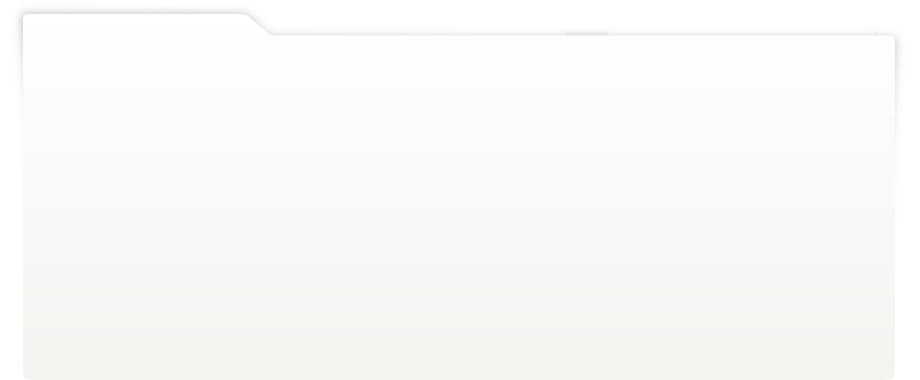
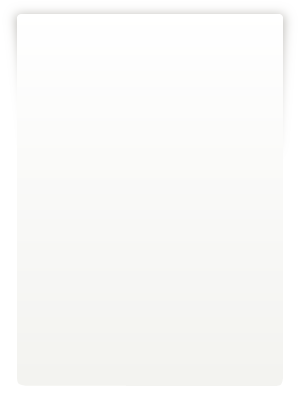
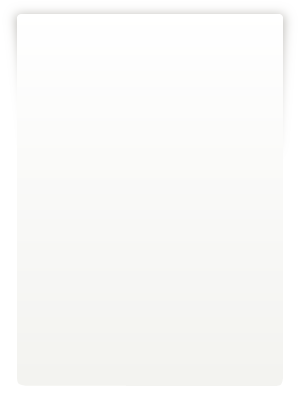
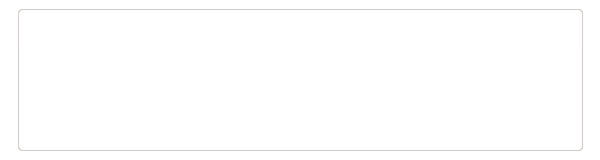
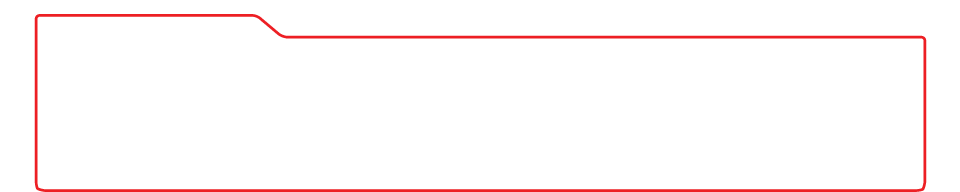
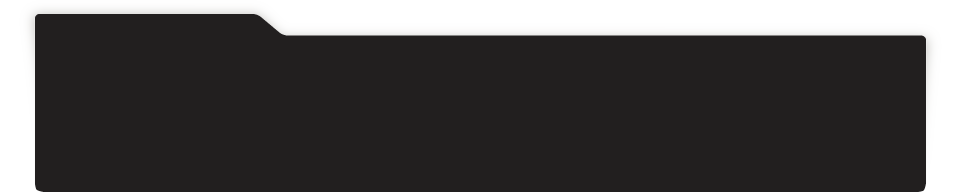
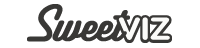
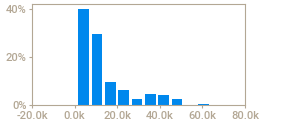
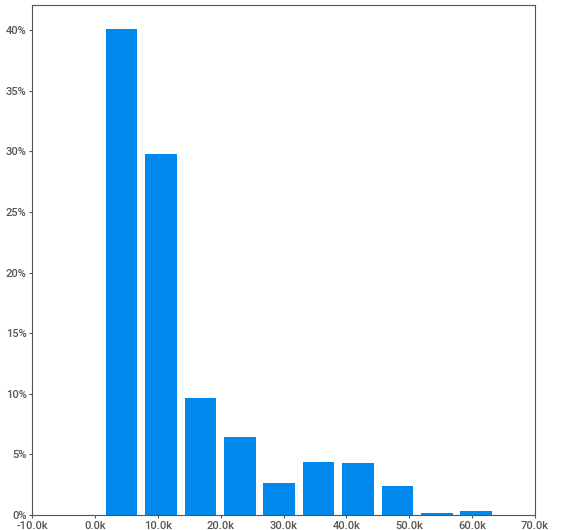
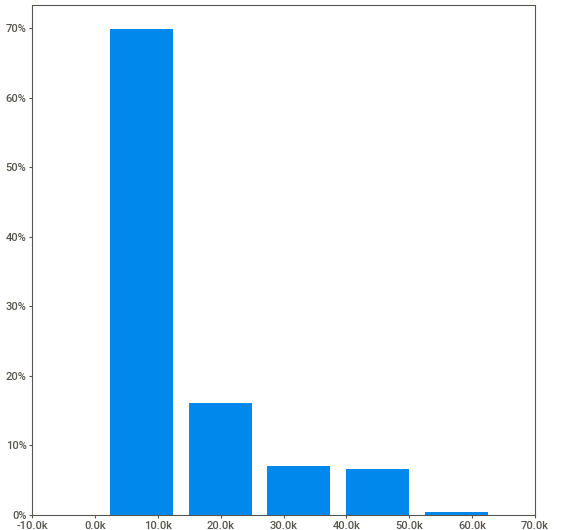
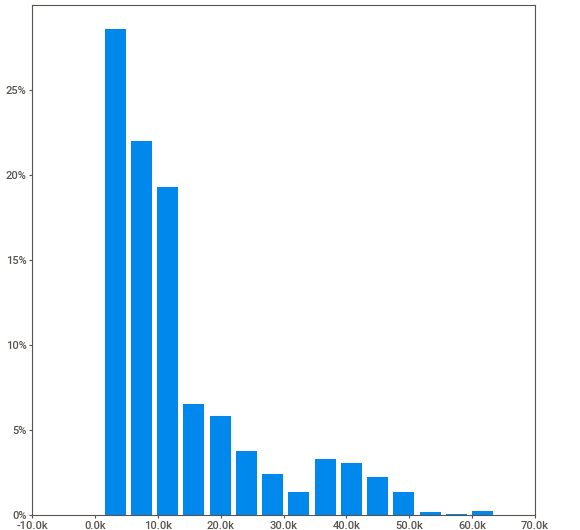
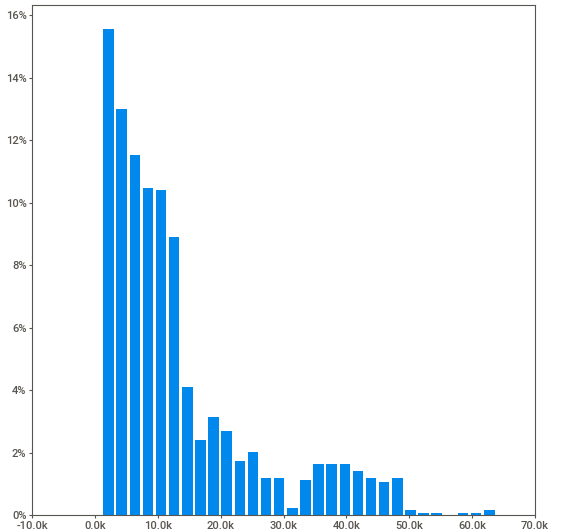
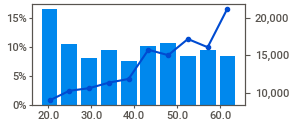
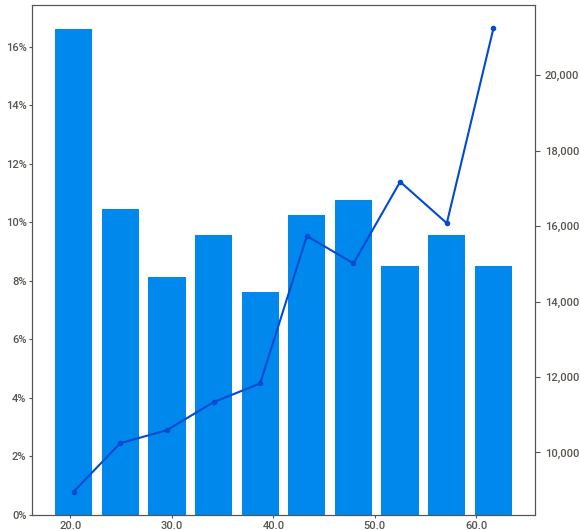
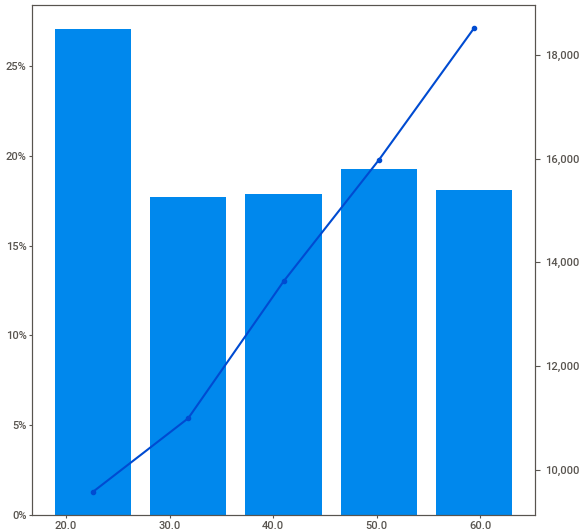
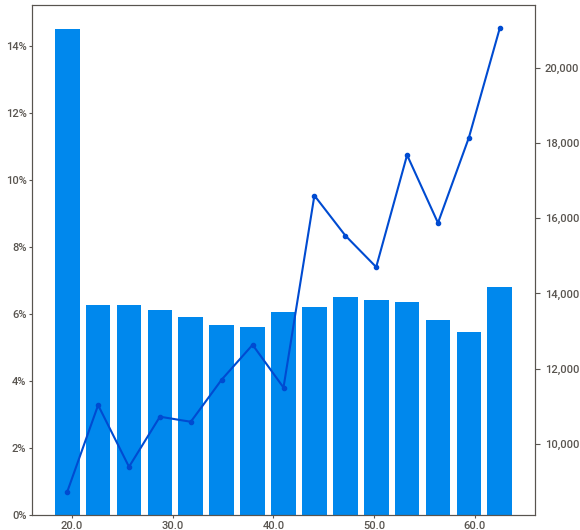
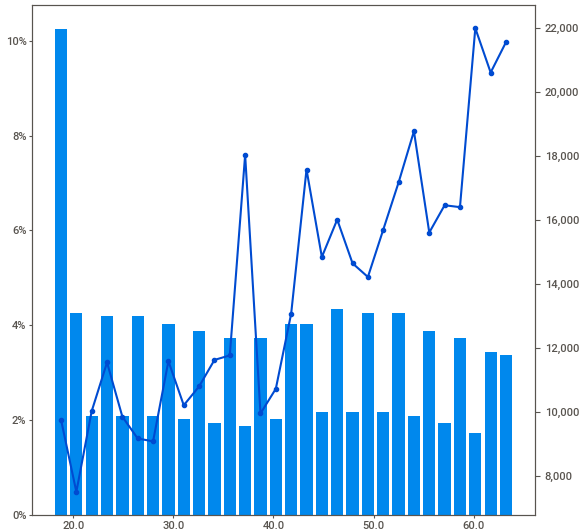
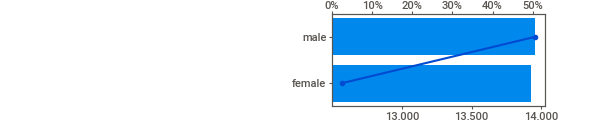
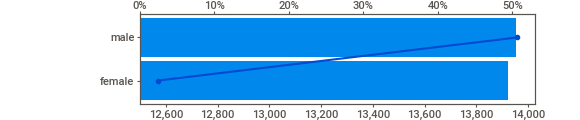
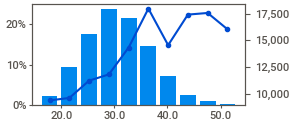
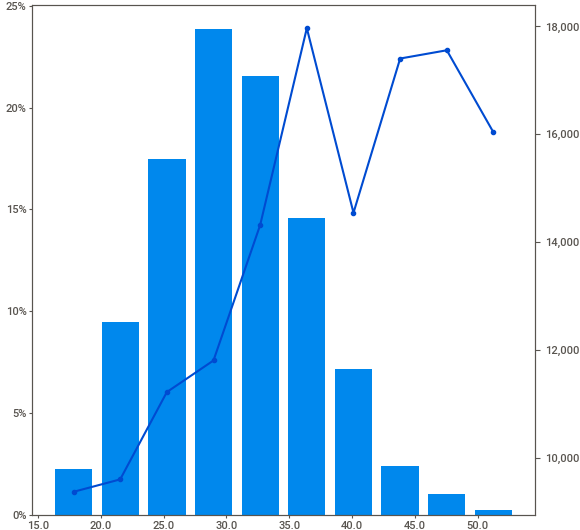
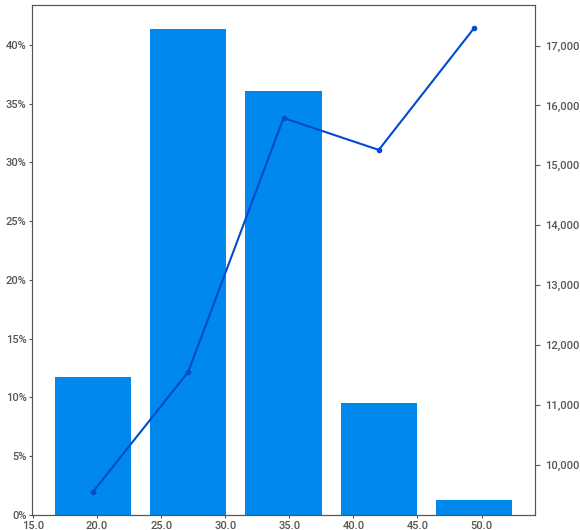
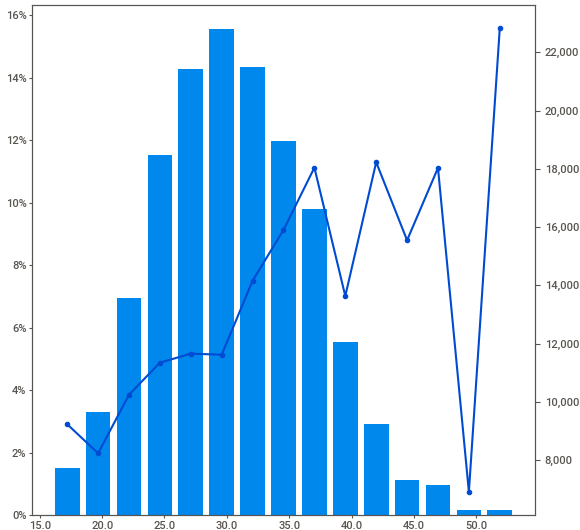
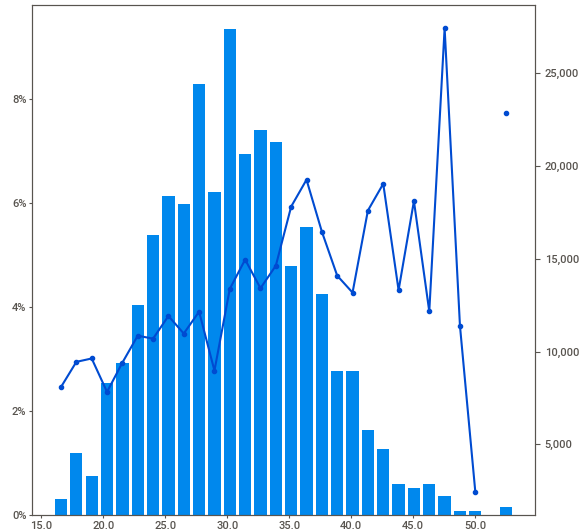
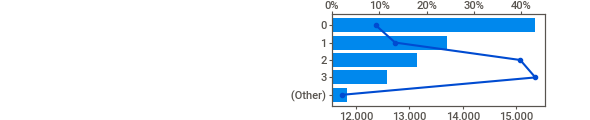
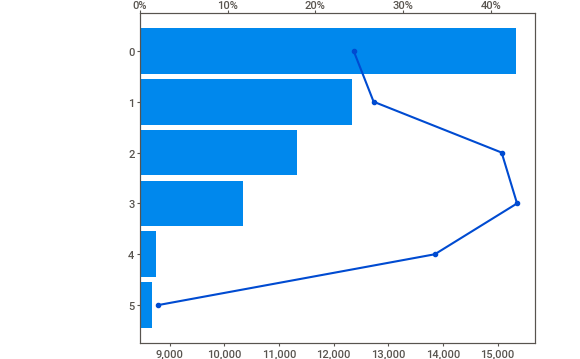
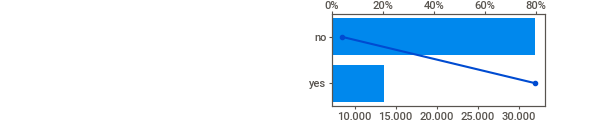
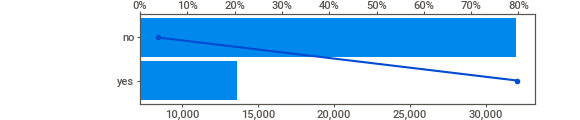
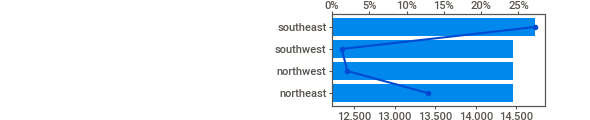
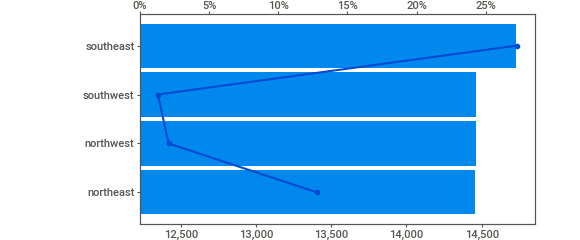
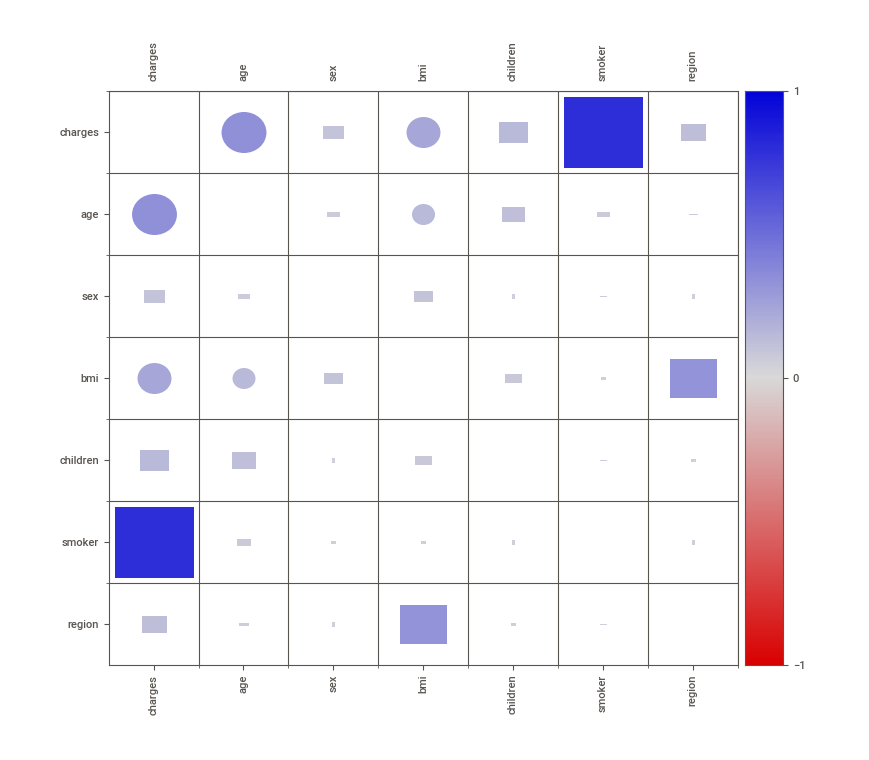
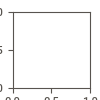

In [ ]:
eda.show_notebook()

#Em Associations : Análise de correlação das variáveis



Em ML, queremos variáveis que estejam correlacionadas com a variavel resposta.
Avaliando a matriz de correlação, nota-se que o indice de massa corporal (bmi) está correlacionada a variavel resposta (charge), ou seja, auxilia a prever o custo(charges).

Há correlação com a variavel:idade(age), indice de massa corporal(bmi) e fumante (smokers). A variavel fumante tem maior correlação com a variavel resposta (charges)

Analisando algumass variaveis:

*   idade(age): os custos vão subindo a medida que a idade vai aumentando
*   sexo: base de dados bem uniforme em relação ao sexo. O gráfico não está começando do zero, mas há uma pequena diferença ao custo,  os beneficiarios do sexo masculino há um custo um pouco maior.
*   dependentes(childrens): beneficiarios com 3 dependentes tem um custo maior que beneficiarios com 0,2 e 1 dependente, mas pode estar relacionado a idade( quem é mais velho tem mais dependente - causalidade)
*   fumantes(smokers): mais de 80% dos beneficiarios não fumam e os fumantes apresentam o maior custo em relação aos não fumantes

 











# Mise and place para Modelagem


Em Machine Learning, em geral, todas as variáveis do conjunto de dados que será utilizado precisam ser númericas. É também interessante que o intervalo de variabilidade das variáveis contínuas não seja tão grande e esteja próximo de zero.

Para tanto, façamos as seguintes transformações:

Transformar a variável smoker em 0 (não) ou 1 (sim)
Colocar a variável resposta na escala para cada mil dolares

In [12]:
dados['smoker'] = dados['smoker'].map({'yes': 1, 'no': 0})
dados['charges'] = dados['charges']/1000 

# Dividi por 1000 para diminuir a escala

Considerando as variáveis: BMI,charges e smoker

In [13]:
dados = dados[['bmi', 'smoker', 'charges']]
dados.head()

,bmi,smoker,charges
0,27.900,1,16.884924
1,33.770,0,1.725552
2,33.000,0,4.449462
3,22.705,0,21.984471
4,28.880,0,3.866855


Colocando no gráfico de dispersão

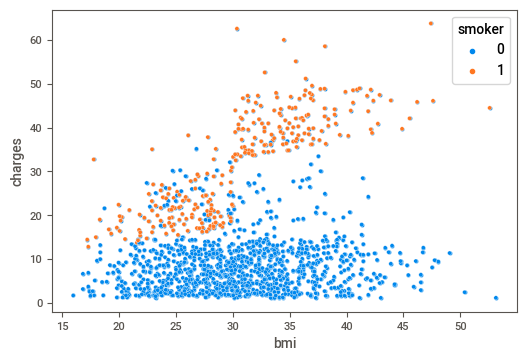

In [14]:
#Criando um gráfico de dispersão usando a biblioteca seaborn
import seaborn as sns

sns.scatterplot(x = 'bmi', y = 'charges', data = dados);
sns.scatterplot(x = 'bmi', y = 'charges', hue = 'smoker', data = dados);

#fumante é 1 e não fumante é 0

Modelo de Machine Learning

In [15]:
from sklearn.linear_model import LinearRegression

# Modelo para prever a variável CHARGES a partir da BMI

X = dados[['bmi']]
y = dados['charges'] 

regressao = LinearRegression()
regressao.fit(X, y) #treinamento do modelo

LinearRegression()

Nesse cenário, o modelo de regressão linear é dado por

**CUSTOS = b0 + b1 * IMC **

**Coeficientes b0 e b1**

In [16]:
# Resgatando os coeficientes ajustados

print('b0 = ', regressao.intercept_)
print('b1 = ', regressao.coef_ [0] )

b0 =  1.1929372089611512
b1 =  0.3938730307973951


**Predição de dados novos**

In [17]:
# Usando o modelo de regressão linear na prática

novos_dados = pd.DataFrame({'bmi': [15, 20, 28, 33]})
regressao.predict(novos_dados)

#Valores "x1000 dolares"

array([ 7.10103267,  9.07039782, 12.22138207, 14.19074723])

Podemos observar que os custos estimados para uma pessoa com Índice de Massa Corporal igual a:

*   IMC = 15 a previsão de custos é de 7.101,00 dólares
*   IMC = 20 a previsão de custos é de 9.070,00 dólares
*   IMC = 28 a previsão de custos é de 12.221,00 dólares
*   IMC = 33 a previsão de custos é de 14.191,00 dólares











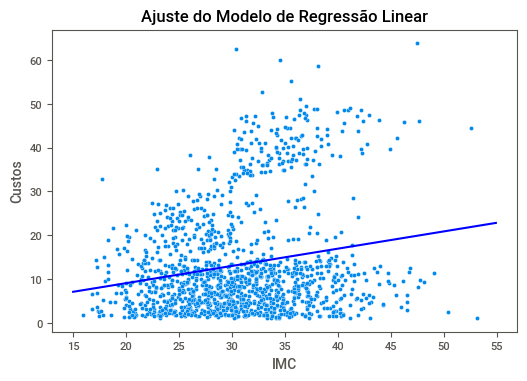

In [18]:
# Gráfico do Ajuste

b0 = regressao.intercept_
b1 = regressao.coef_

import numpy as np
pontos_em_x = np.arange(15, 55, 0.1)
pontos_em_y = b0 + b1 * pontos_em_x

sns.scatterplot(x = 'bmi', y = 'charges', data = dados)

import matplotlib.pyplot as plt
plt.plot(pontos_em_x, pontos_em_y, color = 'blue')
plt.title('Ajuste do Modelo de Regressão Linear')
plt.xlabel('IMC')
plt.ylabel('Custos')
plt.show()

Metricas de validação do modelo

**Erro Quadrático Medio (EQM)**
O EQM é uma métrica usada para medir a qualidade do ajuste do modelo antes de colocá-lo em operação. Assim, podemos verificar o quanto o modelo está errando em sua previsão

In [19]:
# Erro Quadrático Médio

preditos = regressao.predict(X)
eqm = ((y - preditos)**2).mean() 
eqm

140.7779000985077

In [20]:
from sklearn.metrics import mean_squared_error 
eqm = mean_squared_error(y, preditos)

print('EQM da Regressão Linear: {}'.format(round(eqm, 2)))

EQM da Regressão Linear: 140.78


Não podemos considerar que este valor de EQM representa o erro do ajuste do modelo pois, para medir o desempenho do mesmo, precisamos de um método de validação.

Assim, vamos utilizar a técnica HoldOut onde vamos separar, aleatoriamente, o conjunto de dados em treino (treinar o modelo) e teste (avaliar o desempenho do modelo).

**Estratégia de validação**


In [21]:
# Técnica HOLDOUT
from sklearn.model_selection import train_test_split 

25% dos dados serão usados para teste e 75% para treinamento.

Vamos fazer o ajuste do modelo utilizando os dados de treino (Xtreino e ytreino) e avaliar o modelo ajustado nos dados de teste (Xteste e yteste). Desta forma, o EQM será calculado apenas nos dados de teste.

In [22]:
train_test_split(X, y, test_size = 0.25)

[         bmi
 306   27.500
 782   35.970
 1212  21.470
 234   24.510
 914   24.605
 ...      ...
 612   33.155
 113   35.720
 496   23.600
 431   20.235
 1228  34.430
 
 [1003 rows x 1 columns],          bmi
 85    22.895
 283   32.395
 208   31.800
 864   25.400
 1092  32.700
 ...      ...
 542   36.300
 1102  38.940
 461   30.000
 339   27.720
 311   24.700
 
 [335 rows x 1 columns], 306     20.177671
 782      9.386161
 1212     1.702455
 234      6.710192
 914      5.257508
           ...    
 612      2.207697
 113      2.404734
 496      4.931647
 431      4.906410
 1228    10.594226
 Name: charges, Length: 1003, dtype: float64, 85      21.098554
 283     11.879104
 208     13.880949
 864      8.782469
 1092     3.591480
           ...    
 542     13.887204
 1102     3.471410
 461     22.144032
 339      8.232639
 311      1.737376
 Name: charges, Length: 335, dtype: float64]

In [23]:
# Separe os dados em teste e treinamento 
Xtreino, Xteste, ytreino, yteste = train_test_split(X, y, test_size = 0.25)

# Ajuste do modelo nos dados de TREINO
regressao = LinearRegression()
regressao.fit(Xtreino, ytreino)

# Utilize o modelo ajustado para predizer os dados de TESTE
preditos = regressao.predict(Xteste) 

# Calcule o Erro Quadrático Médio nos dados de TESTE 
eqm = mean_squared_error(yteste, preditos)
print('EQM : {}'.format(round(eqm, 2)))

EQM : 153.97


O método Holdout produz resultados com uma certa variabilidade, o que causa incerteza sobre a estimativa do EQM do modelo

# Alimentação do Modelo com mais Informações

vamos inserir mais informações no modelo e considerar as variáveis IMC e fumantes para prever a variável custos.

In [24]:
# Considerando o modelo com DUAS variáveis preditoras

X = dados[['bmi', 'smoker']]
y = dados['charges'] 

Nesse cenário, o modelo de regressão linear é dado por

 **CUSTOS = b0 + b1 * IMC + b2 * FUMANTE**

In [25]:
# Repetindo o procedimento de Validação HOLDOUT
#Dividindo os dados em teste e treinamento
Xtreino, Xteste, ytreino, yteste  = train_test_split(X, y, test_size = 0.25)
#Ajustando o modelo nos dados de TREINO
regressao = LinearRegression()
regressao.fit(Xtreino, ytreino)

#Utilizando o modelo ajustado para predizer os dados de teste
preditos = regressao.predict(Xteste)

#Calculando o EQM nos dados de teste
eqm = mean_squared_error(yteste, preditos)
print('EQM : {}'.format(round(eqm, 2)))

EQM : 42.08


Mesmo com a variabilidade dos valores, esta instabilidade é baixa e , podemos constatar que este modelo é melhor que o anterior. Ou seja, quando alimentamos o modelo com mais informações, temos um ganho de performance.

**Coeficientes b0, b1 e b2**

In [26]:
# Coeficientes
b0 = regressao.intercept_
b1, b2 = regressao.coef_
print('b0 = ', b0)
print('b1 = ', b1)
print('b2 = ', b2)

b0 =  -3.004830957167586
b1 =  0.3738883097558719
b2 =  23.455926487827373


**Gráfico do Ajuste com duas variáveis**

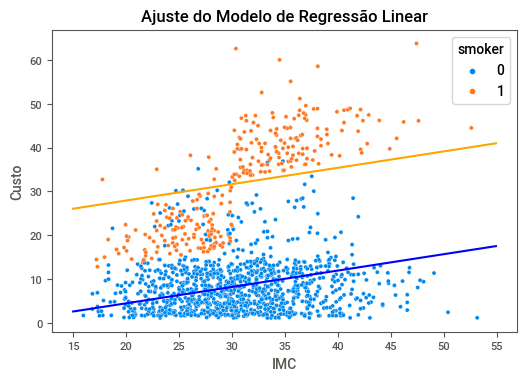

In [27]:
# Gráfico do Ajuste com DUAS Variáveis
#Gerando intervalo dos valores do eixo x
x = np.arange(15, 55, 0.1)

#Reta para variavel fumantes =0 (não)
y0 = b0 + b1*x + b2*0

#Reta para variável fumantes = 1 (sim)
y1 = b0 + b1*x + b2*1

#Plotando os pontos no gráfico
sns.scatterplot(x = 'bmi', y = 'charges', hue = 'smoker', data = dados)

#Gerando as retas laranja e azul no gráfico
plt.plot(x, y0, color = 'blue')
plt.plot(x, y1, color = 'orange')

#Gerando  o titulo e as labels para os eixos x e y
plt.title('Ajuste do Modelo de Regressão Linear')
plt.xlabel('IMC')
plt.ylabel('Custo')

#Mostrar o gráfico
plt.show()

**Valor mais confiável no EQM**

Uma forma de obter um valor mais estável para o EQM é rodar a técnica HoldOut diversas vezes, variando os dados do conjunto de teste e treino e tirar uma média simples dos valores de EQM encontrados em cada repetição.

Esta prática é uma forma de diminuir a influência de aleatoriedades nas posições dos dados de treinamento e teste.


# Exercício Proposto da aula 
Faça repetições da técnica Holdout, de maneira a variar os dados que ficam no conjunto de treino e teste. Guarde os resultados do EQM para cada repetição e, no final, calcule sua média para obter uma valor mais estável para o EQM.

In [34]:
#Fazendo 50 repetições
R = 50

#EQM medio
eqm_mean= []
for i in range(R):
    Xtreino, Xteste, ytreino, yteste  = train_test_split(X, y, test_size = 0.25)
    regressao = LinearRegression()
    regressao.fit(Xtreino, ytreino)
    preditos = regressao.predict(Xteste)
    eqm = mean_squared_error(yteste, preditos)
    eqm_mean.append(eqm)
    print('EQM : {}'.format(round(eqm, 2)))

EQM : 46.41
EQM : 51.6
EQM : 49.42
EQM : 47.57
EQM : 49.73
EQM : 54.99
EQM : 44.62
EQM : 47.22
EQM : 51.84
EQM : 57.48
EQM : 55.59
EQM : 50.41
EQM : 41.23
EQM : 44.32
EQM : 45.37
EQM : 48.84
EQM : 55.6
EQM : 53.19
EQM : 58.69
EQM : 43.3
EQM : 45.54
EQM : 45.66
EQM : 47.9
EQM : 43.9
EQM : 46.06
EQM : 49.57
EQM : 48.26
EQM : 43.33
EQM : 53.21
EQM : 45.48
EQM : 52.41
EQM : 55.52
EQM : 50.0
EQM : 53.46
EQM : 53.7
EQM : 42.43
EQM : 48.96
EQM : 45.49
EQM : 48.3
EQM : 47.61
EQM : 52.33
EQM : 51.45
EQM : 50.93
EQM : 48.91
EQM : 46.18
EQM : 48.23
EQM : 50.2
EQM : 55.25
EQM : 49.65
EQM : 51.92


In [35]:
print('O valor médio do EQM ', round(np.mean(eqm_mean), 2))

O valor médio do EQM  49.38


É importante dizer que para esta esta técnica, é importante uma quantidade suficiente de dados para dividir em grupos de treino e teste a fim de ter menos variabilidade do EQM e gerar modelos melhores ajustados.